File: DSC680_Final_Project_2_Code_ARybinski.ipynb
Name: Adrian Rybinski
Date: October 24, 2022
Course: DSC 680 - Applied Data Science
Assignment: Final Project 2
Desc: Final Project 2

Importing data and preparing for data visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
import yellowbrick
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Read the CSV file
addr1 = "C://Users/smerf/Desktop/School Work/DSC680/Project2/HeartDisease.csv"
hdorgdf = pd.read_csv(addr1)

In [3]:
# Check the dimension of the table
print("The dimension of the table is: ", hdorgdf.shape)

The dimension of the table is:  (1025, 14)


In [4]:
# Look at the data
print(hdorgdf.head(5))
hdorgdf.info()

   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [5]:
# summarize numerical data
hdorgdf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
target,1025.0,0.513171,0.500070,0.0,0.0,1.0,1.0,1.0


In [6]:
# summarize categorical data
hdorgdf.describe(exclude=['float', 'int']).T

,count,unique,top,freq
sex,1025,2,Male,713
chest_pain_type,1025,4,Typical angina,497
fasting_blood_sugar,1025,2,Lower than 120 mg/ml,872
rest_ecg,1025,3,ST-T wave abnormality,513
exercise_induced_angina,1025,2,No,680
slope,1025,3,Flat,482
vessels_colored_by_flourosopy,1025,5,Zero,578
thalassemia,1025,4,Fixed Defect,544


In [7]:
# Count null values in each column
hdorgdf.isna().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

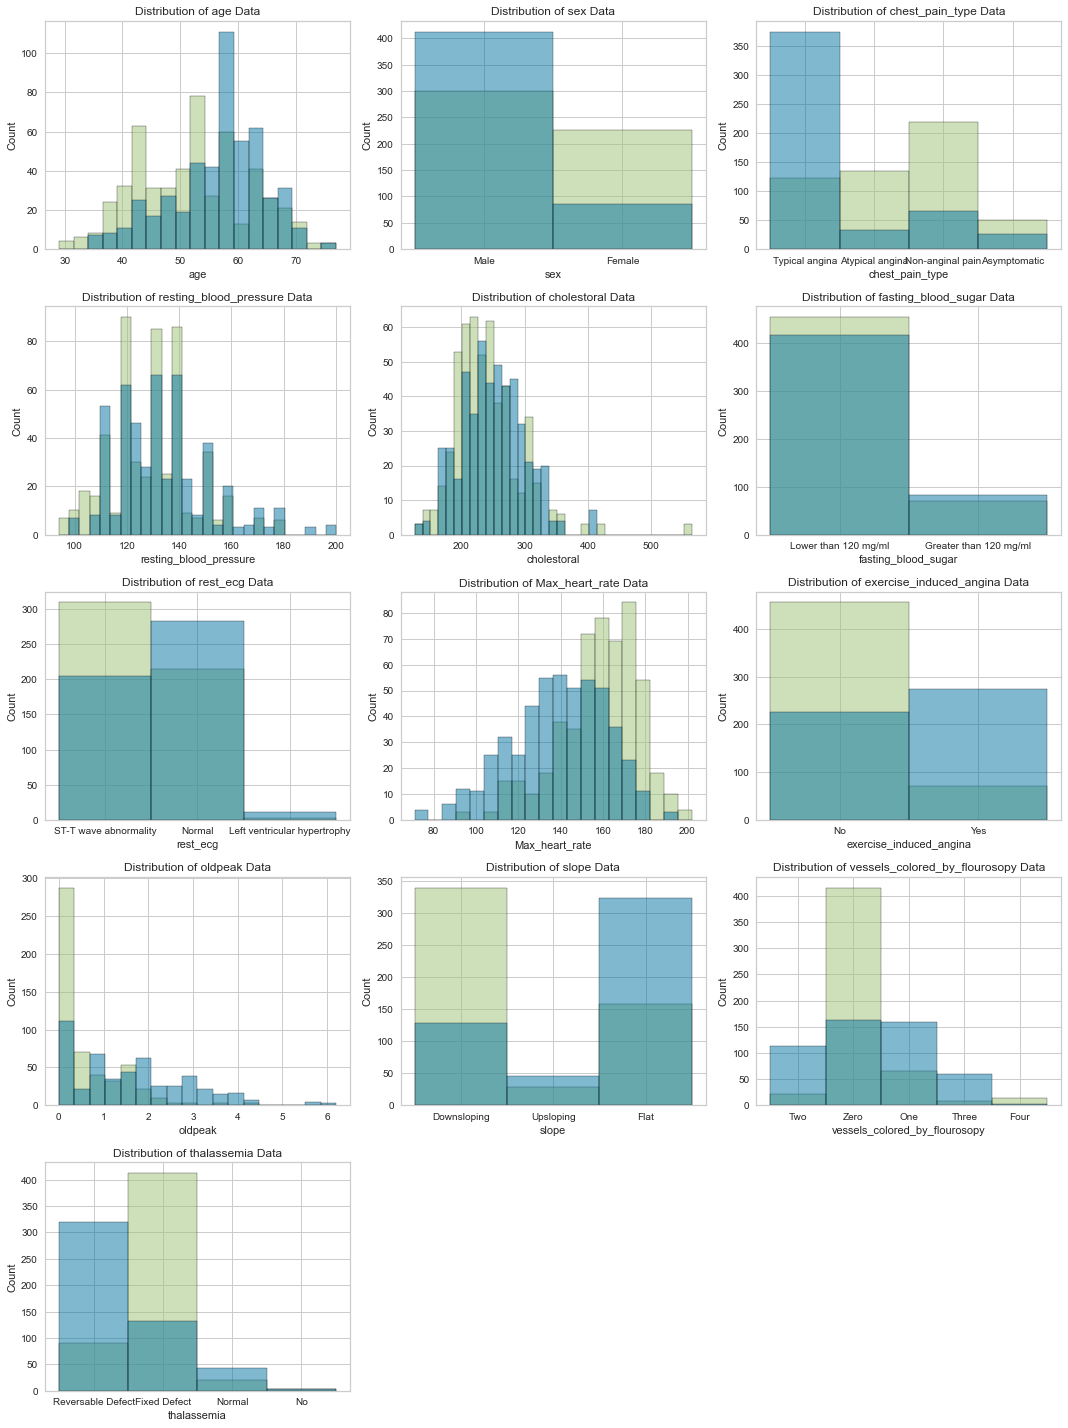

In [8]:
# Look at histograms by variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(hdorgdf.columns[:-1], 1):
  plt.subplot(5, 3, i)
  plt.title(f'Distribution of {col} Data')
  sns.histplot(data=hdorgdf, x=col, kde=False, hue='target', legend=False)
  plt.tight_layout()
  plt.plot()
plt.show()

In [9]:
#Create new df in case I have to go back to original file
df = hdorgdf

In [10]:
# encode sex to 0/1 from Male/Female
df.sex.replace(['Male', 'Female'], [0, 1], inplace=True)
# encode chest pain to numerical values
df.chest_pain_type.replace(['Asymptomatic', 'Typical angina', 'Atypical angina', 'Non-anginal pain'], [0, 1, 2, 3], inplace=True)
# encode sugaer level to 0/1 based on above or below 120 mg/ml
df.fasting_blood_sugar.replace(['Lower than 120 mg/ml', 'Greater than 120 mg/ml'], [0, 1], inplace=True)
# encode rest_ecg to numerical values
df.rest_ecg.replace(['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'], [0, 1, 2], inplace=True)
#encode exercise induced angina to binary from Yes/No
df.exercise_induced_angina.replace(['No', 'Yes'], [0, 1], inplace=True)
#change slope to numerical values
df.slope.replace(['Flat', 'Downsloping', 'Upsloping'], [0, 1, 2], inplace=True)
#change vessels_colored_by_flourosopy to numerical
df.vessels_colored_by_flourosopy.replace(['Zero', 'One', 'Two', 'Three', 'Four'], [0, 1, 2, 3, 4], inplace=True)
#change thalassemia to numerical
df.thalassemia.replace(['No', 'Normal', 'Reversable Defect', 'Fixed Defect',], [0, 1, 2, 3], inplace=True)

In [11]:
#check the new data frame
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,0,1,125,212,0,1,168,0,1.0,1,2,2,0
1,53,0,1,140,203,1,0,155,1,3.1,2,0,2,0
2,70,0,1,145,174,0,1,125,1,2.6,2,0,2,0
3,61,0,1,148,203,0,1,161,0,0.0,1,1,2,0
4,62,1,1,138,294,1,1,106,0,1.9,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,0,2,140,221,0,1,164,1,0.0,1,0,3,1
1021,60,0,1,125,258,0,0,141,1,2.8,0,1,2,0
1022,47,0,1,110,275,0,0,118,1,1.0,0,1,3,0
1023,50,1,1,110,254,0,0,159,0,0.0,1,0,3,1


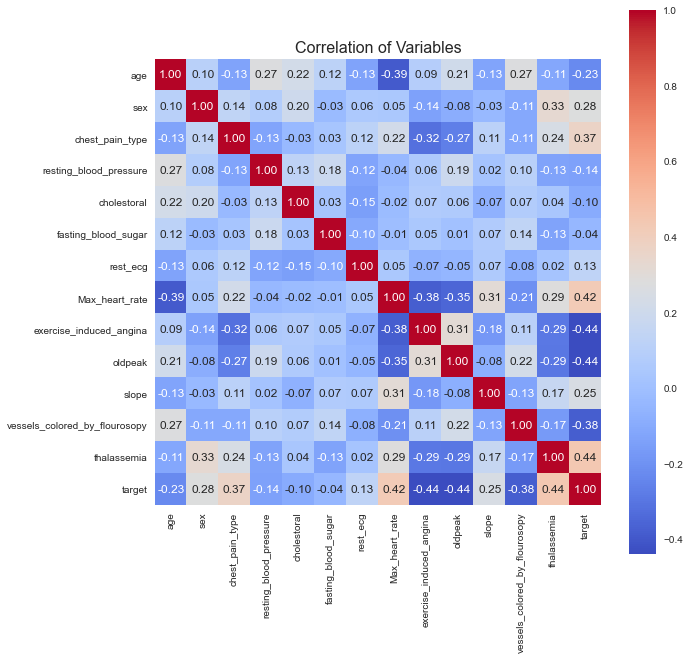

In [12]:
#look at the correlation between the variables
corr = df.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Correlation of Variables', size=16)
plt.show()

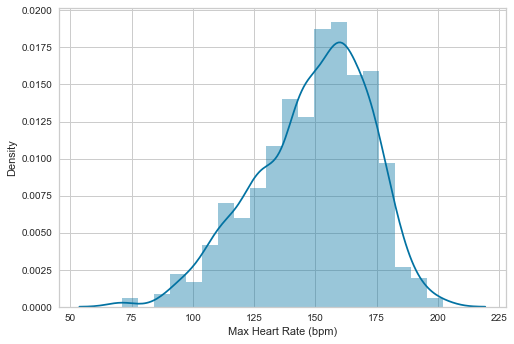

In [13]:
#check distribution of heart rate
sns.distplot(df['Max_heart_rate']) # histogram distribution
plt.xlabel('Max Heart Rate (bpm)')
plt.show()

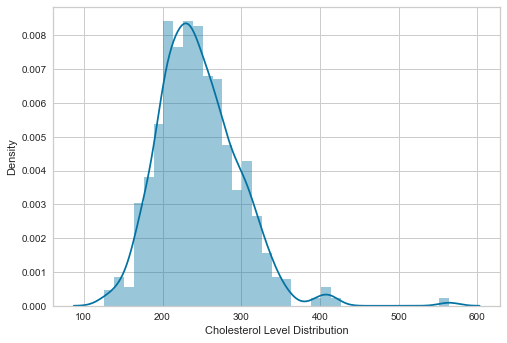

In [14]:
#check distribution of cholesterol
#check distribution of heart rate
sns.distplot(df['cholestoral']) # histogram distribution
plt.xlabel('Cholesterol Level Distribution')
plt.show()

In [15]:
#Change some date to categories
df[['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia', 'target']] = df[['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia', 'target']].astype('category')

In [16]:
# Look at the data
print(df.head(5))
df.info()

   age sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52   0               1                     125          212   
1   53   0               1                     140          203   
2   70   0               1                     145          174   
3   61   0               1                     148          203   
4   62   1               1                     138          294   

  fasting_blood_sugar rest_ecg  Max_heart_rate exercise_induced_angina  \
0                   0        1             168                       0   
1                   1        0             155                       1   
2                   0        1             125                       1   
3                   0        1             161                       0   
4                   1        1             106                       0   

   oldpeak slope vessels_colored_by_flourosopy thalassemia target  
0      1.0     1                             2           2      0  
1      3.1     2

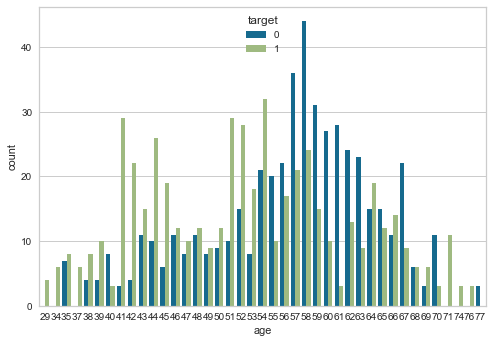

In [17]:
#Making a histogram of the number of observations based on the age
sns.countplot(x = 'age', data = df, hue = 'target')
plt.show()

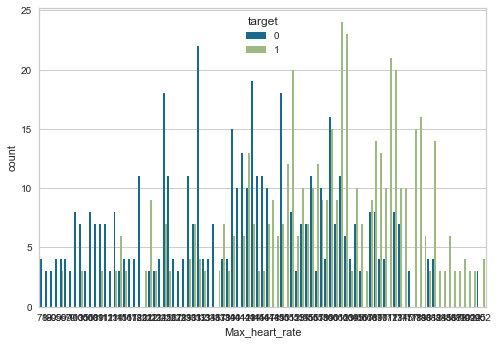

In [18]:
#Making a histogram of the number of observations based on the value variable
sns.countplot(x = 'Max_heart_rate', data = df, hue = 'target')
plt.show()

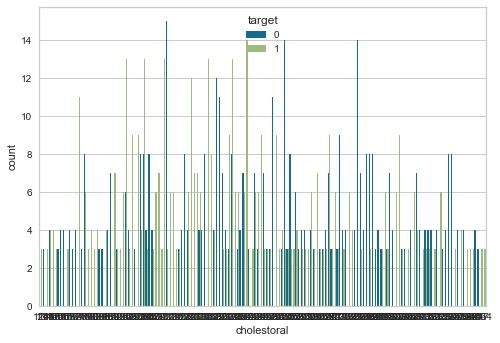

In [19]:
#Making a histogram of the number of observations based on cholestoral
sns.countplot(x = 'cholestoral', data = df, hue = 'target')
plt.show()

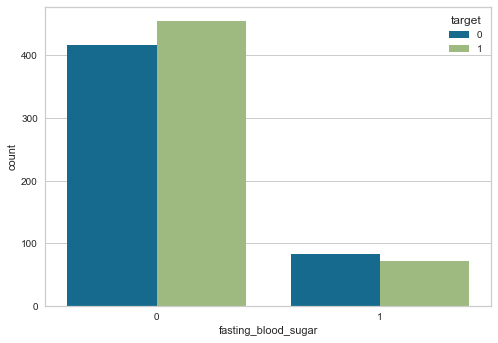

In [20]:
#Making a histogram of the number of observations based on sugar level
sns.countplot(x = 'fasting_blood_sugar', data = df, hue = 'target')
plt.show()

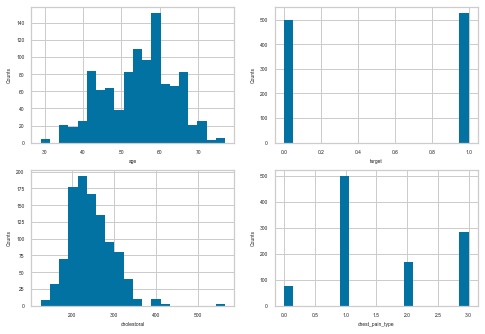

In [21]:
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['age', 'target', 'cholestoral', 'chest_pain_type']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=20)
    ax.set_xlabel(xaxes[idx], fontsize=5)
    ax.set_ylabel(yaxes[idx], fontsize=5)
    ax.tick_params(axis='both', labelsize=5)
plt.show()

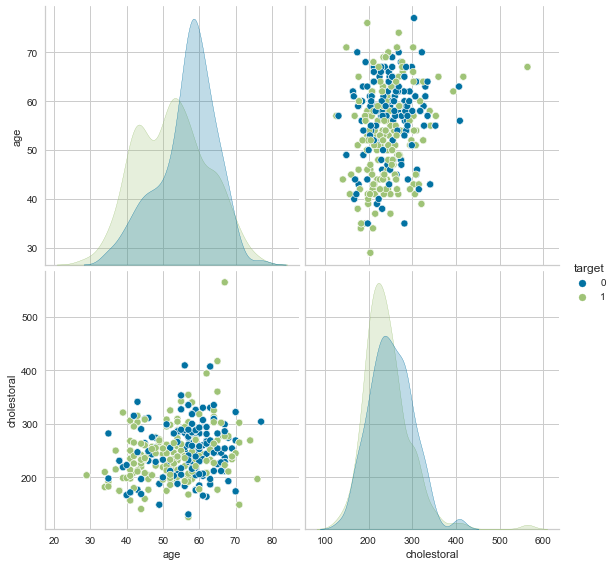

In [22]:
#Making a pair plot that shows a correlation of income and property values variables
sns.pairplot(df, height = 4, vars = ['age', 'cholestoral'], hue = 'target')

Model Design and Fit

In [23]:
# Look at the data
print(df.head(5))
df.info()

   age sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52   0               1                     125          212   
1   53   0               1                     140          203   
2   70   0               1                     145          174   
3   61   0               1                     148          203   
4   62   1               1                     138          294   

  fasting_blood_sugar rest_ecg  Max_heart_rate exercise_induced_angina  \
0                   0        1             168                       0   
1                   1        0             155                       1   
2                   0        1             125                       1   
3                   0        1             161                       0   
4                   1        1             106                       0   

   oldpeak slope vessels_colored_by_flourosopy thalassemia target  
0      1.0     1                             2           2      0  
1      3.1     2

In [24]:
#change values to binary for easier evaluation
df['hchol'] = ['1' if a >= 200 else '0' for a in df['cholestoral']]
df['hrate'] = ['1' if a >= 150 else '0' for a in df['Max_heart_rate']]
df['hpress'] = ['1' if a >= 130 else '0' for a in df['resting_blood_pressure']]

In [25]:
#Change some date to categories
df[['hchol', 'hrate', 'hpress']] = df[['hchol', 'hrate', 'hpress']].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1025 non-null   int64   
 1   sex                            1025 non-null   category
 2   chest_pain_type                1025 non-null   category
 3   resting_blood_pressure         1025 non-null   int64   
 4   cholestoral                    1025 non-null   int64   
 5   fasting_blood_sugar            1025 non-null   category
 6   rest_ecg                       1025 non-null   category
 7   Max_heart_rate                 1025 non-null   int64   
 8   exercise_induced_angina        1025 non-null   category
 9   oldpeak                        1025 non-null   float64 
 10  slope                          1025 non-null   category
 11  vessels_colored_by_flourosopy  1025 non-null   category
 12  thalassemia                    102

In [27]:
#Pull in the data columns needed for the model
modeldf = df[['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'thalassemia', 'hchol', 'hrate', 'hpress', 'target']]

In [28]:
modeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   sex                      1025 non-null   category
 1   chest_pain_type          1025 non-null   category
 2   fasting_blood_sugar      1025 non-null   category
 3   rest_ecg                 1025 non-null   category
 4   exercise_induced_angina  1025 non-null   category
 5   slope                    1025 non-null   category
 6   thalassemia              1025 non-null   category
 7   hchol                    1025 non-null   category
 8   hrate                    1025 non-null   category
 9   hpress                   1025 non-null   category
 10  target                   1025 non-null   category
dtypes: category(11)
memory usage: 12.6 KB


In [29]:
#Allocating the x and y values from the dataframe and splitting out training set
X = modeldf.iloc[:, :-1]
y = modeldf.iloc[:, 10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [30]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.762195 (0.044725)
LDA: 0.769512 (0.057057)
KNN: 0.809756 (0.040520)
CART: 0.928049 (0.019244)
NB: 0.769512 (0.049821)
SVM: 0.768293 (0.057200)


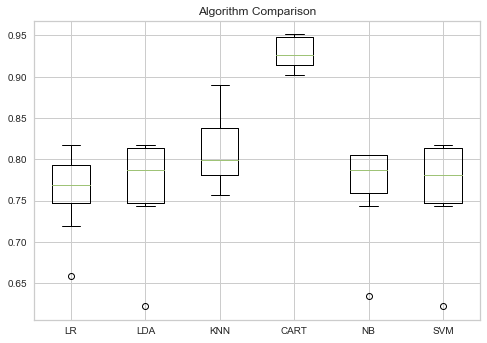

In [31]:
# compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Run Preditcions

In [32]:
# make predictions on validation dataset - DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_validation)

In [33]:
# evaluate predictions
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.9463414634146341
[[103   6]
 [  5  91]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       109
           1       0.94      0.95      0.94        96

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



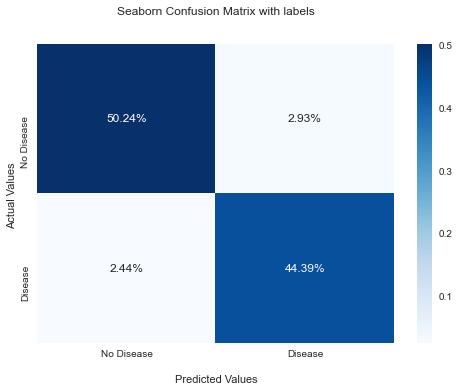

In [37]:
cf_matrix = confusion_matrix(Y_validation, pred)

#graph confusion matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['No Disease','Disease'])
ax.yaxis.set_ticklabels(['No Disease','Disease'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [38]:
# make predictions on validation dataset - KNN
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_validation)

In [39]:
# evaluate predictions
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.848780487804878
[[93 16]
 [15 81]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       109
           1       0.84      0.84      0.84        96

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



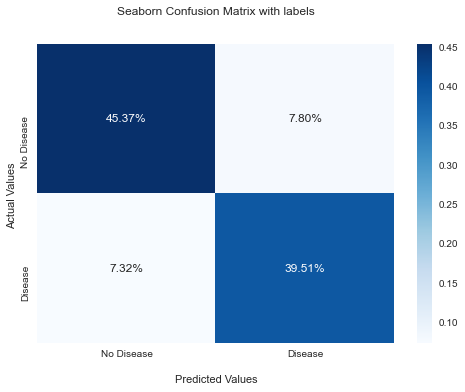

In [40]:
cf_matrix = confusion_matrix(Y_validation, pred)

#graph confusion matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['No Disease','Disease'])
ax.yaxis.set_ticklabels(['No Disease','Disease'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
# make predictions on validation dataset - GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
pred = model.predict(X_validation)

In [42]:
# evaluate predictions
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.7609756097560976
[[81 28]
 [21 75]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       109
           1       0.73      0.78      0.75        96

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



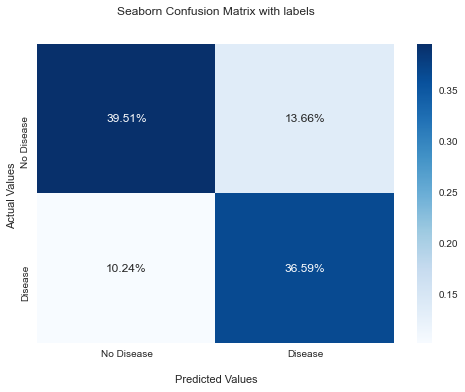

In [43]:
cf_matrix = confusion_matrix(Y_validation, pred)

#graph confusion matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['No Disease','Disease'])
ax.yaxis.set_ticklabels(['No Disease','Disease'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [44]:
#added another model type to see if the preditctions are more accurtate
from sklearn.ensemble import AdaBoostClassifier

In [45]:
# make predictions on validation dataset - ADA
model = AdaBoostClassifier(random_state = 0,)
model.fit(X_train, Y_train)
pred = model.predict(X_validation)

In [46]:
# evaluate predictions
print(accuracy_score(Y_validation, pred))
print(confusion_matrix(Y_validation, pred))
print(classification_report(Y_validation, pred))

0.7902439024390244
[[87 22]
 [21 75]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       109
           1       0.77      0.78      0.78        96

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.79       205
weighted avg       0.79      0.79      0.79       205



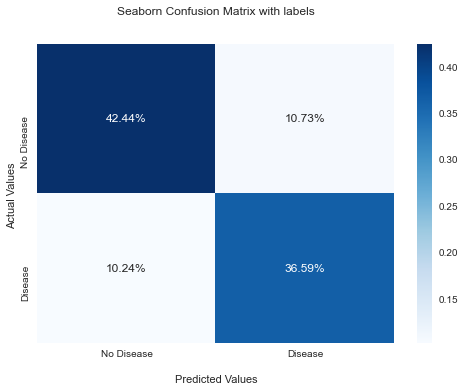

In [47]:
cf_matrix = confusion_matrix(Y_validation, pred)

#graph confusion matrix
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels
ax.xaxis.set_ticklabels(['No Disease','Disease'])
ax.yaxis.set_ticklabels(['No Disease','Disease'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [48]:
#Pull in the data columns needed for the charts
modeldf2 = df[['sex', 'hchol', 'hrate', 'hpress', 'target']]

In [49]:
modeldf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     1025 non-null   category
 1   hchol   1025 non-null   category
 2   hrate   1025 non-null   category
 3   hpress  1025 non-null   category
 4   target  1025 non-null   category
dtypes: category(5)
memory usage: 5.7 KB


In [50]:
#Allocating the x and y values from the dataframe and splitting out training set
X = modeldf2.iloc[:, :-1]
y = modeldf2.iloc[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [51]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.721951 (0.049024)
LDA: 0.723171 (0.049702)
KNN: 0.696341 (0.054932)
CART: 0.713415 (0.052947)
NB: 0.709756 (0.044575)
SVM: 0.723171 (0.049702)


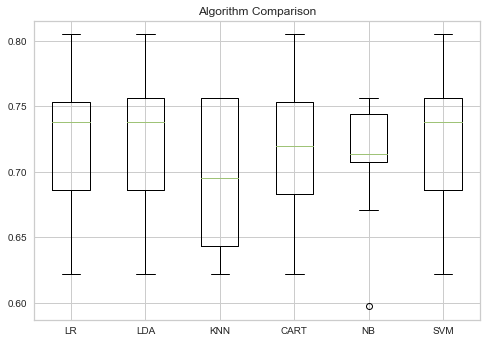

In [52]:
# compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()